# Linear Regression 
## Objectives 
1. Understand the differences between variance, covariance and correlation. 
2. Be able to explain each piece of the linear regression formula including terminology typically associated with regression 
3. Understand the assumptions of regression 
3. Use diabetes dataset to fit a simple linear regression model using _statsmodels package_

## What is linear regression? 
> Regression Analysis is a **parametric** technique meaning a set of parameters are used to **predict** the value of an unknown target variable (or dependent variable)  based on one or more of known input features (or independent variables, predictors), often denoted by _x_  .

## Covariance and Correlation

The idea of _correlation_ is the simple idea that variables often change _together_. For a simple example, cities with more buses tend to have higher populations.

We might observe that, as one variable X increases, so does another Y, OR that as X increases, Y decreases.

The _covariance_ describes how two variables co-vary. Note the similarity in the definition to the definition of ordinary variance:


**Variance**: Measure of dispersion from the mean for continuous random variables. How far a set of numbers are spread out from their overall average value. <br/>
n = # of data points <br/>
$x_i$ = individuals data points <br/>
$mu$ = mean 
$$\sigma^2 = \sum_{i}^{n}\frac{(x_i -\mu )^2}{n}$$

**Covariance**: Measure of how variables differ/relate to one another
$$\sigma_{xy} = \frac{\sum_{i,j}^{n} (x_i -\mu_x )(y_j - \mu_y)}{n}$$

Problem: 
* Positive covariance  --> correlates (together)
* Negative covariance --> correlates inversely

But ranges (-∞,∞) so what is a "stronger" relationship?

So, we need: 

## Correlation
Pearson's Correlation: Normalizes covariance so relationships are now represented on a [-1, 1] scale

$$ r = \frac{\sum_{i,j}^{n}(x_i -\mu_x)(y_j - \mu_y)} {\sqrt{\sum_{i,j}^{n}(x_i - \mu_x)^2 (y_j-\mu_y)^2}}$$

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-0-10-03-cov-corr-online-ds-sp-000/master/images/correlation.png' width=70%/>

In [1]:
#load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

import seaborn as sns

#load the dataset
df = pd.read_csv('data/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


> *Note:* Examples in this lecture use the Pima Indians Diabetes data which was taken from a larger collection of data, originally collected by the National Institute of Diabetes and Digestive Kidney Diseases. It provides diagnostic data on 768 females of Pima Indian heritage aged 21 years or older. The analyses presented in this post are intended to illustrate an approach to linear regression modeling and should not be used to draw substantive conclusions on biomedical pathologies.

In [2]:
df = df.loc[:, ["Age", "Glucose"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      768 non-null    int64
 1   Glucose  768 non-null    int64
dtypes: int64(2)
memory usage: 12.1 KB


> The Age column provides each participant's age measured in years. Glucose is a measure of each participant's plasma glucose concentration at 2 hours from an oral glucose tolerance test. In the current analyses we will use age to predict participants' plasma glucose concentration.

## Terminology 


### Basics: 
**Independent Variable:** the data we are using to make a prediction. In this case: _Age_. <br/>
AKA - predictor, feature, inputs. 

**Dependent Variable:** the data we are trying to predict. In this case: _glucose_. <br/>
AKA - target, outcome or outputs. 

For our first model:

$$ y = m \cdot x + b $$

Here:

- $x$: input column (just one for now)
- $y$: output column (column we're trying to predict)

Solving for the coefficients $m$(our slope) and $b$(y-intercept)  - based on the line that 'best' represents the relationship between $x$ and $y$, _assuming_ that relationship is a straight line.

**Let's pre-process our data and do a tiny bit of EDA - Remember our crisp-dm method?** 
![](https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png)


In [3]:
df.describe()

,Age,Glucose
count,768.000000,768.000000
mean,33.240885,120.894531
std,11.760232,31.972618
min,21.000000,0.000000
25%,24.000000,99.000000
50%,29.000000,117.000000
75%,41.000000,140.250000
max,81.000000,199.000000


In [4]:
#how many rows have 0 for Glucose? 
(df['Glucose'] == 0).sum()

5

In [5]:
#let's get rid of zeros using .loc
df = df.loc[df['Glucose'] != 0, :]

In [6]:
df.describe()

,Age,Glucose
count,763.000000,763.000000
mean,33.271298,121.686763
std,11.772161,30.535641
min,21.000000,44.000000
25%,24.000000,99.000000
50%,29.000000,117.000000
75%,41.000000,141.000000
max,81.000000,199.000000


Ok great, now let's look at the correlation between our two variables

In [7]:
df[["Age", "Glucose"]].corr()

,Age,Glucose
Age,1.000000,0.267136
Glucose,0.267136,1.000000


The correlation between age and glucose concentration is 0.27, indicating a slight positive relationship. This means that older participants tend to have higher glucose concentrations relative to younger participants, on average. We can visualize this relationship with a scatterplot to get a better idea of the observed relationship between age and glucose levels.

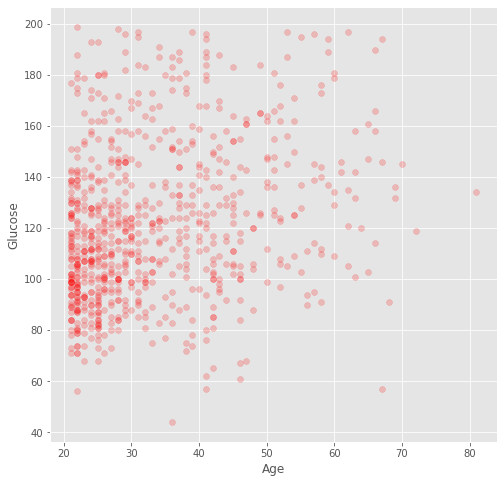

In [8]:
plt.figure(figsize=(8, 8))
ax = plt.axes()
ax.scatter(df["Age"], df["Glucose"], color='r', alpha=0.20)
ax.set_xlabel('Age')
ax.set_ylabel('Glucose')
plt.show();

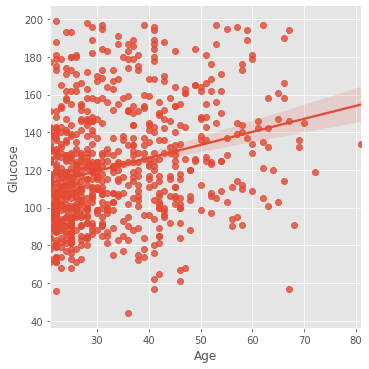

In [9]:
sns.lmplot(x='Age', y='Glucose', data=df)
plt.show()

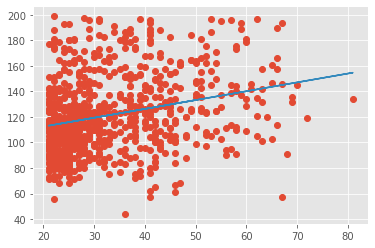

In [10]:
X = df['Age']
y = df['Glucose']

plt.plot(X, y, 'o')
m, b = np.polyfit(X, y, 1)

plt.plot(X, m*X + b);

## Let's build a model using StatsModels 

In [11]:
import statsmodels.api as sm

To ensure that the intercept value from our model lends itself to an interpretation that is consistent with the observed data, it is a good idea to recode age by subtracting the minimum value of 21 from each individual age value. Otherwise, the intercept value will be extrapolated to observations at age zero, which doesn't exist in this dataset. 

In [12]:
df["Age"] = df["Age"] - df["Age"].min()

In [13]:
#instatiate OLS model 
model = sm.OLS(df['Glucose'], df['Age'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                Glucose   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.555
Method:                 Least Squares   F-statistic:                              951.3
Date:                Tue, 22 Jun 2021   Prob (F-statistic):                   3.34e-136
Time:                        15:09:16   Log-Likelihood:                         -4460.3
No. Observations:                 763   AIC:                                      8923.
Df Residuals:                     762   BIC:                                      8927.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

_Note:_ <br/>
sm.OLS only contains information on the structure of our model. If you run sm in a Python shell or Jupyter notebook cell, you will just get the following output:_<statsmodels.regression.linear_model.OLS at 0x1a27daa990>_ . At this point, we still need to fit the model to our data, which we can do by applying the fit method to sm.OLS. So, let's overwrite smOLS with a fitted model.

### Initial Interpretations of Summary stats
There is a lot going on here, so I only want to focus on a few pieces of output. First, the R-squared has a value of 0.555. 
> First, if we interpret R² as the proportion of variance in the outcome accounted for by our model, this value tells us that our model — with just one independent variable — accounts for roughly 56% of the variance in glucose levels.

> Second, the value of 5.4991 under the coef column in the Age row provides the regression weight for our predictor, age. We can interpret this value to mean the for every year increase in age the predicted glucose concentration increases by a value of roughly 5.50. Thus, a participant whose age is one year above the minimum (i.e., age 22) is expected to have a glucose concentration that is about 5.50 units higher than a participant who is at the minimum age (i.e., age 21).

## What else is there? 
The std err, P>|t|, 0.025, and 0.975 columns provide the standard error, p-value, lower-bound of the 95% confidence interval, and upper-bound of the 95% confidence interval, respectively. The p-value of 0.000 tells us that the effect of age on glucose is statistically significant at conventional levels of significance (statistical significance is also apparent as the 95% confidence interval does not cross zero).

_Note:_  OLS excludes the intercept by default. To add the intercept we can rewrite our model, explicitly adding the intercept to the predictor with add_constant.


In [14]:
model2 = sm.OLS(df["Glucose"], sm.add_constant(df["Age"])).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     58.48
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           6.21e-14
Time:                        15:09:16   Log-Likelihood:                -3662.5
No. Observations:                 763   AIC:                             7329.
Df Residuals:                     761   BIC:                             7338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.1837      1.540     73.479      0.000     110.160     116.208
Age            0.6929      0.091      7.647      0.000       0.515       0.871
==============================================================================
Omnibus:                       26.554   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.808
Skew:                           0.475   Prob(JB):                     5.55e-07
Kurtosis:                       2.932   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R² value in this output is 0.071, much smaller than the R² of 0.555 from the model excluding the intercept. The lesson here is that when the intercept is excluded from a linear regression model the R² is artificially inflated ([here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-why-are-r2-and-f-so-large-for-models-without-a-constant/) is a nice explanation of why this happens).

> Moving to the middle of the output, we now have an additional set of results. Namely, the row labeled const , which provides the results for the intercept. The coef value of 113.1837 for const means that at the minimum age value, the predicted glucose concentration value from this model is roughly 113. The coef value of 0.6929 for Age means that with each one-year increase in age, glucose concentration is predicted to increase by a value of 0.6929. We can plug the intercept and regression weight estimates from the statsmodels output into the prediction equation for happiness.

Glucose= 113.1837+ 0.6929*(Age-21) <br/>
Based on this formula, a participant who is 31 years old, for instance, is predicted to have a glucose concentration of about 120. <br/>
120.1127 = 113.1837+ 0.6929*(31–21)


## How am I able to draw these conclusions? 


### Let's break down the regression line and the associated error 

<img src='https://rasbt.github.io/mlxtend/user_guide/regressor/LinearRegression_files/simple_regression.png' />

A **residual** is the difference between the actual value and the predicted value for a point we tried to predict where we knew the actual correct answer.


$$ \text{Squared Sum of Residuals} = \sum\limits_{i=1}^{n} (y_i - \text{y_pred}_{i})^{2}$$

## Coefficient of Determination 

Very often a data scientist will calculate $R^2$, the *coefficient of determination*, as a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $y = \mu_Y$, for dependent variable $Y$.

The actual calculation of $R^2$ is: <br/> $\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation in the dependent variable your model explains.

## Assumptions of Linear Regression 



### 1. Linearity

**The relationship between the target and predictor is linear.** Check this by drawing a scatter plot of your predictor and your target, and see if there is evidence that the relationship might not follow a straight line OR look at the correlation coefficient.

**What can I do if it looks like I'm violating this assumption?**

- Consider log-scaling your data. <br/>
- Consider a different type of model!

## 2. Normality
The normality assumption states that the model _residuals_ should follow a normal distribution.
**Note**: the normality assumption talks about the model residuals and not about the distributions of the variables!

**How can I check for this?**
* Check the Omnibus value (This is a test for error normality. The probability is the chance that the errors are normally distributed.)
* Build a QQ-Plot.

**What can I do if it looks like I'm violating this assumption?**
* Drop outliers 
* Consider log-scaling your data 

### Let's look at a qqplot of our residuals 

<ipython-input-16-0089d8149034>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


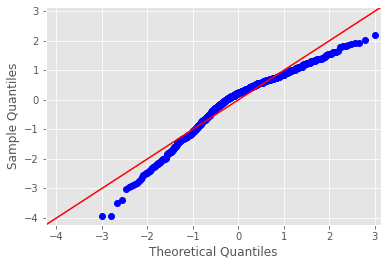

In [16]:
import scipy.stats as stats
residuals = results.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.show();

<img src='https://github.com/learn-co-students/dsc-01-10-11-regression-assumptions-online-ds-ft-031119/raw/master/images/inhouse_qq_plots.png' width=700/>

## 3. Homoskedasticity

The errors should be homoskedastic. That is, the errors have the same variance.

Basically if the residuals are evenly spread through range

<img src='https://github.com/learn-co-students/dsc-01-10-11-regression-assumptions-online-ds-ft-031119/raw/master/images/homo_2.png' width=700/>

The residual errors have the same variance.

**How can I check for this?**

* Check the Durbin-Watson score (This is a test for error homoskedasticity. We're looking for values between ~1.5 and ~2.5).
* Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**

* Consider dropping extreme values.
* Consider log-scaling your target.
* Consider a different type of model!

## Violations of Assumptions

No model is perfect, and your assumptions will never hold perfectly. If the violations of assumptions are severe, you can try adjusting the data so the assumptions will hold, such as by... 

- Transforming your data with a non-linear function (e.g. log)
- Only modeling a subset of your data
- Dropping outliers

These can make it harder to explain or interpret your model, but the trade-off may be worth it. Alternatively, you may be better of just using a different type of model (you will learn many).

### Review
![](https://convertwithcontent.com/wp-content/uploads/2014/04/review-the-results-of-your-a-b-split-test-300x225.jpg)
* Pearson correlation coefficient measures the strength of a relationship between two variables ranging from -1(perfect negative relationship) to 1(perfect positive relationship)
* A loss function calculates how well a given model represents the relationship between data values
* A linear regression is simply a (straight) line of best fit for predicting a continuous value (y = mx + b)
* The Coefficient of Determination (R Squared) can be used to determine how well a given line fits a given data set
* Certain assumptions must hold true for a least squares linear regression to be useful - linearity, normality and homoskedasticity
* Q-Q plots can check for normality in residual errors
* The omnibus-value can be used to test for normality
* Durbin-watson score and error plots can check for homoskedasticity